In [1]:
import numpy as np
import scipy
import math
import random
import pandas as pd
from matplotlib import animation
import matplotlib as mpl
import seaborn as sns

from matplotlib.animation import FuncAnimation
import os
import time
from skspatial.objects import Sphere
from scipy.stats import uniform
from scipy.integrate import quad
import tqdm as tqdm

from matplotlib import pyplot as plt
from matplotlib import colormaps
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Jaffe Density Profile

The Jaffe profile (or Jaffe model) is a mathematical function that is used to describe the distribution of mass or light in elliptical galaxies and the bulges of spiral galaxies. It was proposed by the astronomer Walter Jaffe in 1983. Its usefulness derives from the fact that it accurately reproduces a de Vaucouleurs profile when projected onto the sky.

The density in the Jaffe model is given by (see Binney and Treemaine):

$$
    \rho(r) = \frac{\rho_0 R_s^4}{r^2 (r + R_s)^2}.
$$

Where $R_s$ is the scale radius.

In order to generate such a distribution of particles we first have to compute the mass within a given radius r as:

$$
    M(r) = \int_0^r \rho(r) 4 \pi r^2 dr = \dots = 4  \pi \rho_0 R_s^3 \frac{r}{r + R_s}.
$$

The total mass of the distribution is given by performing the limit from $0$ to $\infty$, so that

$$
    M = 4 \pi \rho_0 R_s^3 \longrightarrow \rho_0 = \frac{M}{4 \pi R_s^3}.
$$


Now we find the cumulative distribution function for the radii as

$$
    P(r) = \frac{M(r)}{M} = \frac{r}{r + R_s}.
$$

By inverting this last equation, we can find the inverse cumulative distribution funcion

$$
    r(P) = \frac{P R_s}{1 - P}
$$

The distribution function for $\theta$ and $\phi$ are the usual for spherically symmetric systems:

$$
    P(\phi) = \frac{1}{2 \pi},
$$
$$
    P(\theta) = \frac{1}{2} \left( 1 - \cos\theta \right).
$$

So that we simply have to generate a random $\phi$ between $0$ and $2 \pi$, while for $\theta$ we have to sample $P(\theta)$ from 0 to 1 and then extract $\theta$ as:

$$
    \theta = \arccos\left( 1 - 2P \right)
$$

In [24]:
N = 1000
M = 1
m = M/N
Rs = 1

rho_0 = M / (4 * np.pi * (Rs)**3)

## Density Profile

In [25]:
def Jaffe_profile(radii, Rs, rho_0):
    return (rho_0 * Rs**2)/(radii**2*(radii+Rs))

'''
def Jaffe_profile(r, Rs, rho_0, N):
    return (rho_0 / (4 * np.pi)) * (r/Rs)**(-2) * (1 + r/Rs)**(-2)

def Jaffe_2(r, M, Rs, N):
    return (M / (4 * np.pi)) * (Rs/(r**2 * (r + Rs)**2))
'''

'\ndef Jaffe_profile(r, Rs, rho_0, N):\n    return (rho_0 / (4 * np.pi)) * (r/Rs)**(-2) * (1 + r/Rs)**(-2)\n\ndef Jaffe_2(r, M, Rs, N):\n    return (M / (4 * np.pi)) * (Rs/(r**2 * (r + Rs)**2))\n'

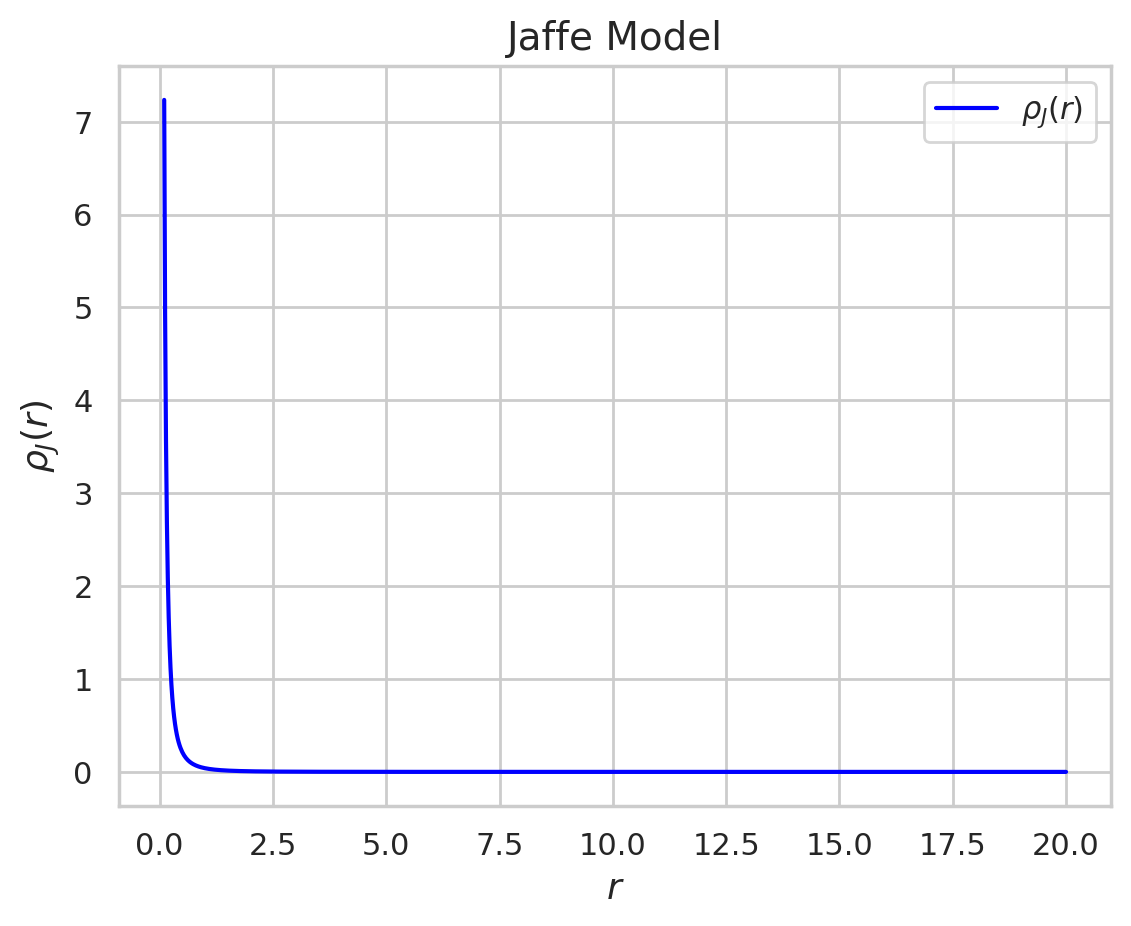

In [47]:
# Set Seaborn style
sns.set(style="whitegrid")

raggi = np.linspace(0.1, 20*Rs, N)
rho_J = Jaffe_profile(raggi, Rs, rho_0)
#rho_J_art = Jaffe_2(raggi, M, Rs, 100)

plt.plot(raggi, rho_J, color='blue', label=r'$\rho_J(r)$')
#plt.plot(raggi, rho_J_art, color='red', alpha=0.6, label='Article')
plt.title('Jaffe Model', fontsize=14)
plt.xlabel(r'$r$', fontsize=13)
plt.ylabel(r'$\rho_J(r)$', fontsize=13)
plt.legend()


## Setting the coordinates

In [48]:
raggi = np.linspace(0.1, 30*Rs, 100)
P_r   = raggi / (raggi + Rs)
#P_r = P_r / max(P_r)

In [49]:
raggi

array([ 0.1       ,  0.4020202 ,  0.7040404 ,  1.00606061,  1.30808081,
        1.61010101,  1.91212121,  2.21414141,  2.51616162,  2.81818182,
        3.12020202,  3.42222222,  3.72424242,  4.02626263,  4.32828283,
        4.63030303,  4.93232323,  5.23434343,  5.53636364,  5.83838384,
        6.14040404,  6.44242424,  6.74444444,  7.04646465,  7.34848485,
        7.65050505,  7.95252525,  8.25454545,  8.55656566,  8.85858586,
        9.16060606,  9.46262626,  9.76464646, 10.06666667, 10.36868687,
       10.67070707, 10.97272727, 11.27474747, 11.57676768, 11.87878788,
       12.18080808, 12.48282828, 12.78484848, 13.08686869, 13.38888889,
       13.69090909, 13.99292929, 14.29494949, 14.5969697 , 14.8989899 ,
       15.2010101 , 15.5030303 , 15.80505051, 16.10707071, 16.40909091,
       16.71111111, 17.01313131, 17.31515152, 17.61717172, 17.91919192,
       18.22121212, 18.52323232, 18.82525253, 19.12727273, 19.42929293,
       19.73131313, 20.03333333, 20.33535354, 20.63737374, 20.93

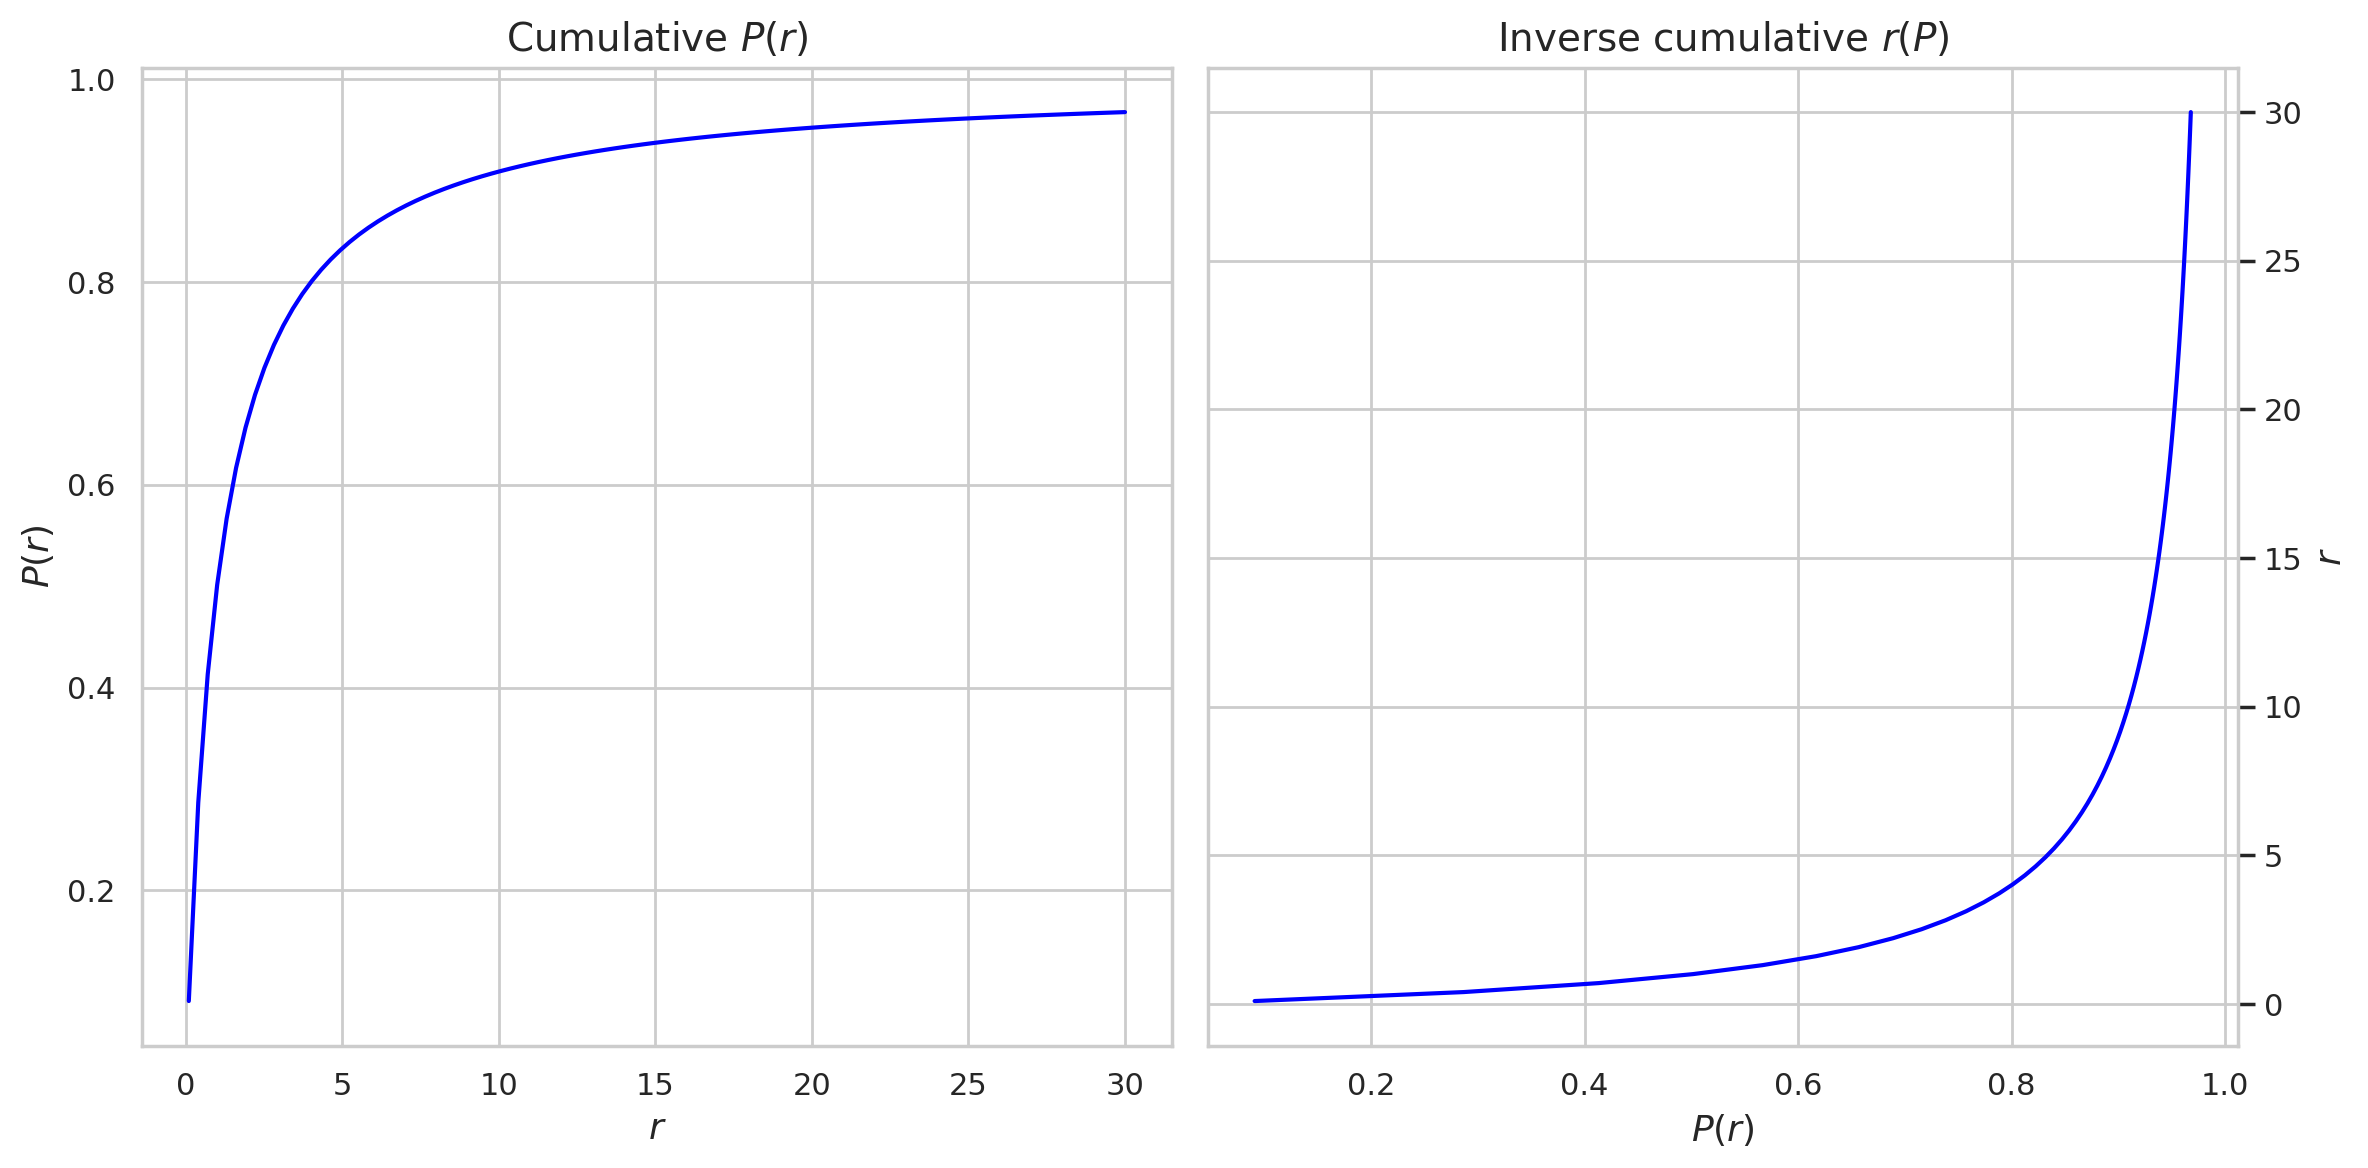

In [50]:
# Set Seaborn style
sns.set(style="whitegrid")

fig, ax = plt.subplots(1, 2, tight_layout=True, figsize=(12, 6))

sns.lineplot(x=raggi, y=P_r, ax=ax[0], color='blue')
ax[0].set_title(r'Cumulative $P(r)$', fontsize=14)
ax[0].set_xlabel(r'$r$', fontsize=13)
ax[0].set_ylabel(r'$P(r)$', fontsize=13)

sns.lineplot(x=P_r, y=raggi, ax=ax[1], color='blue')
ax[1].set_title(r'Inverse cumulative $r(P)$', fontsize=14)
ax[1].set_xlabel(r'$P(r)$', fontsize=13)
ax[1].set_ylabel(r'$r$', fontsize=13)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Common y-axis label
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")

plt.show()

### Inverto la P(r)

In [51]:
def find_radii(Rs, N):
    c = np.random.uniform(0, max(P_r), size=N)
    return (c * Rs) / (1 - c)

In [52]:
Rays = find_radii(Rs, N)
cdf_theta = uniform.rvs(0, 1, size=N)  # cumulative function of thetas
thetas = np.arccos(1 - 2 * cdf_theta)

phis = uniform.rvs(0, 2 * np.pi, size=N)

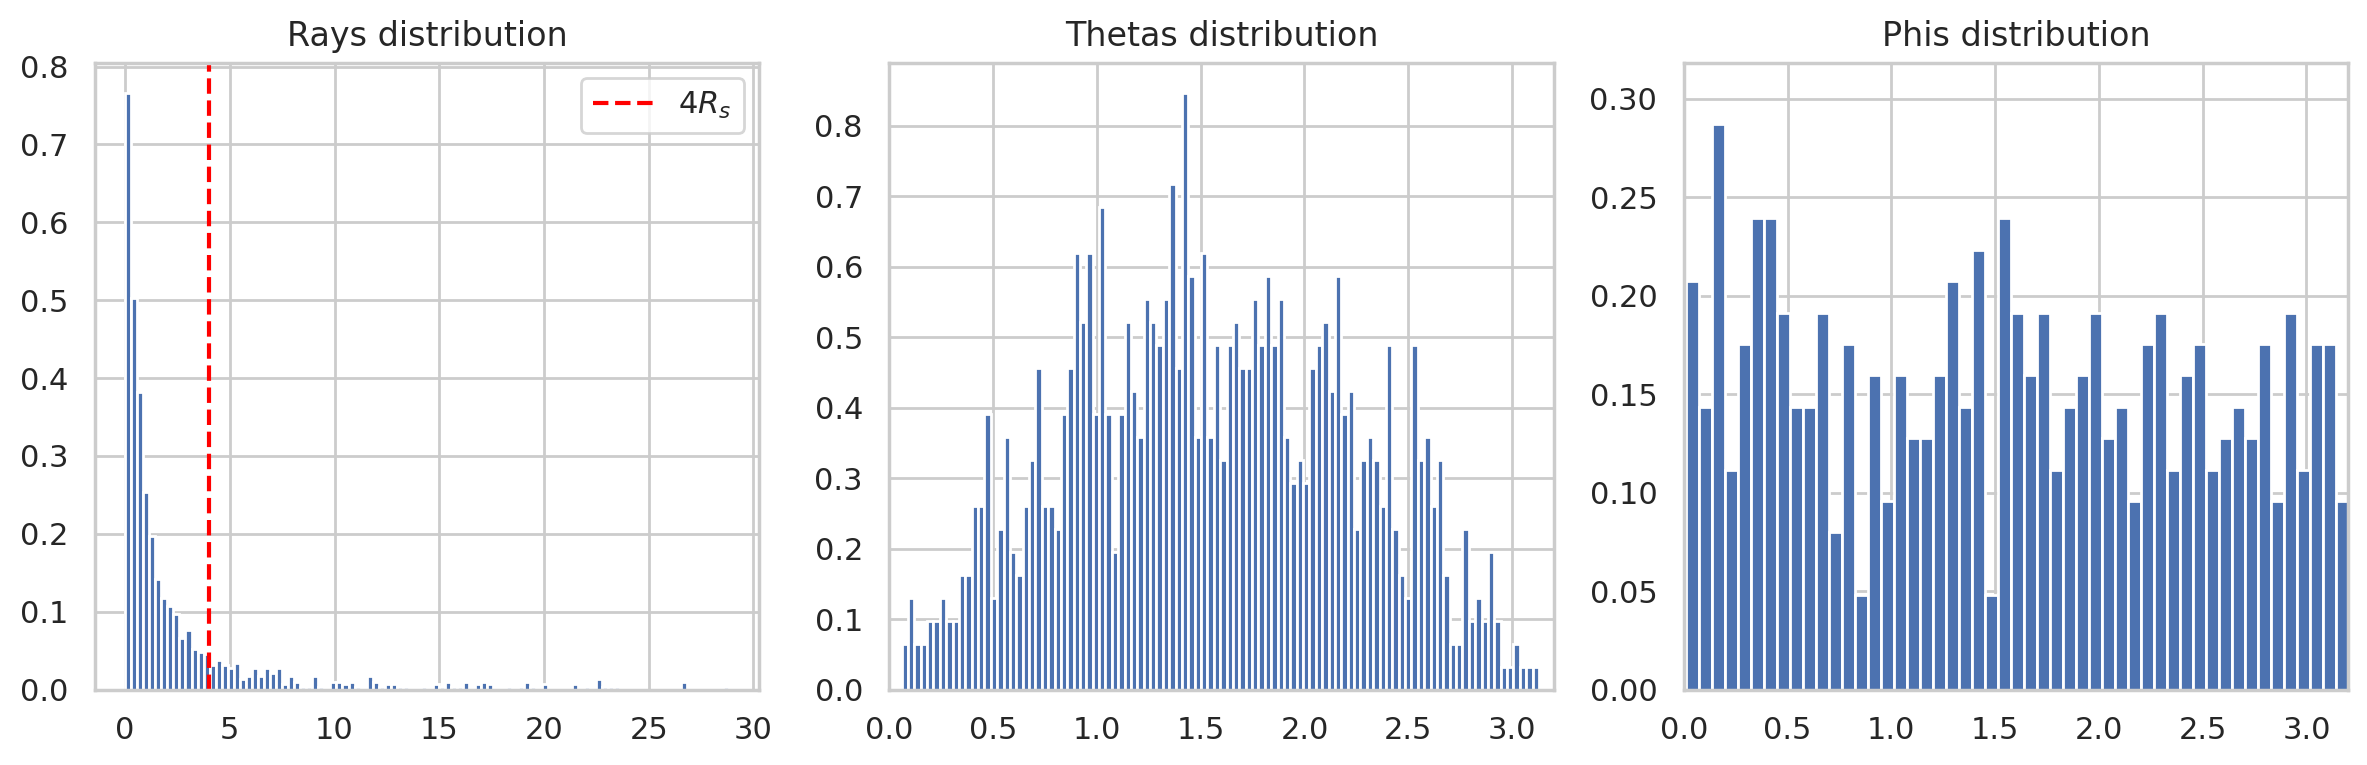

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

#raggi = np.linspace(0, 20, 500)
axes[0].hist(Rays, bins=100, density=True)
axes[0].set_title("Rays distribution")
axes[0].axvline(x = 4*Rs, linestyle='--', color='red', label = r'$4 R_s$')
axes[0].legend()
#axes[0].set_xlim(0,50)


axes[1].hist(thetas, bins=100, density=True)
axes[1].set_title("Thetas distribution")
axes[1].set_xlim(0,3.2)

axes[2].hist(phis, bins=100, density=True)
axes[2].set_title("Phis distribution")
axes[2].set_xlim(0,3.2)

plt.tight_layout()

In [54]:
X = Rays * np.sin(thetas) * np.cos(phis)
Y = Rays * np.sin(thetas) * np.sin(phis)
Z = Rays * np.cos(thetas)

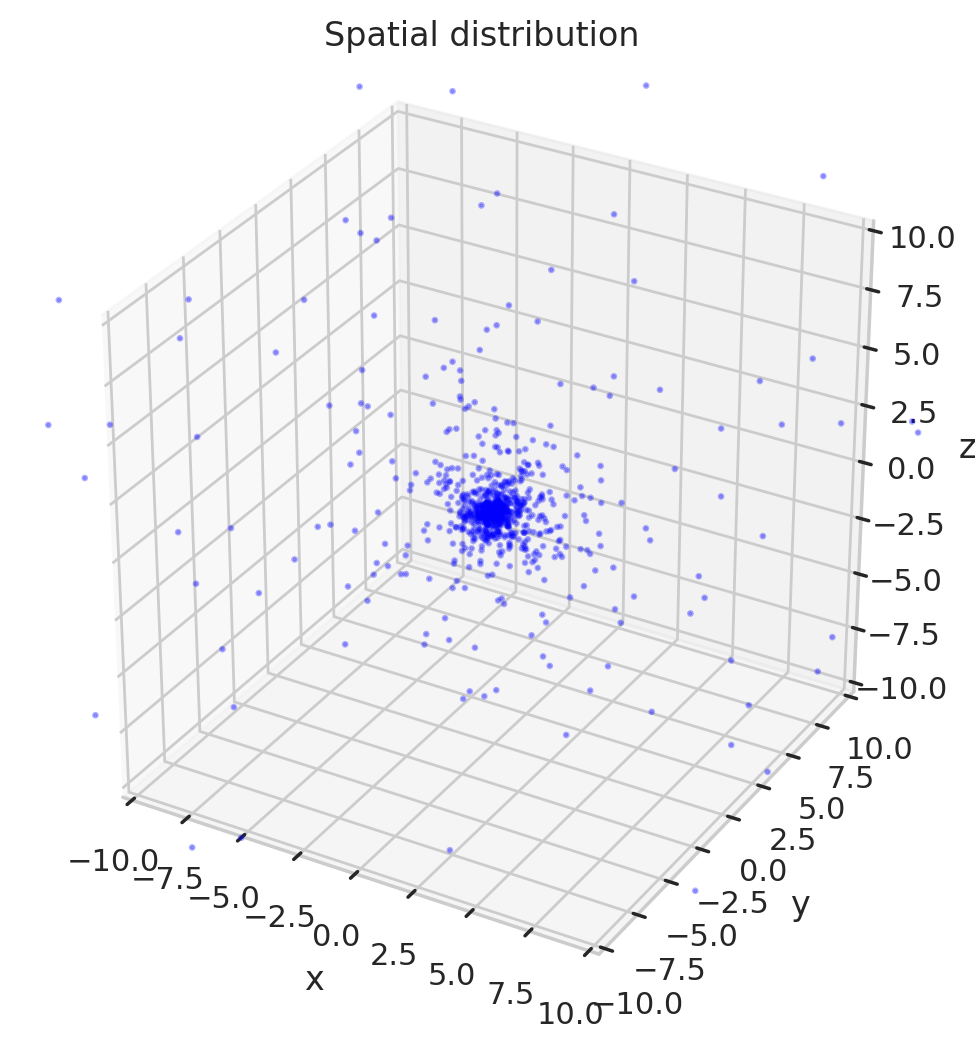

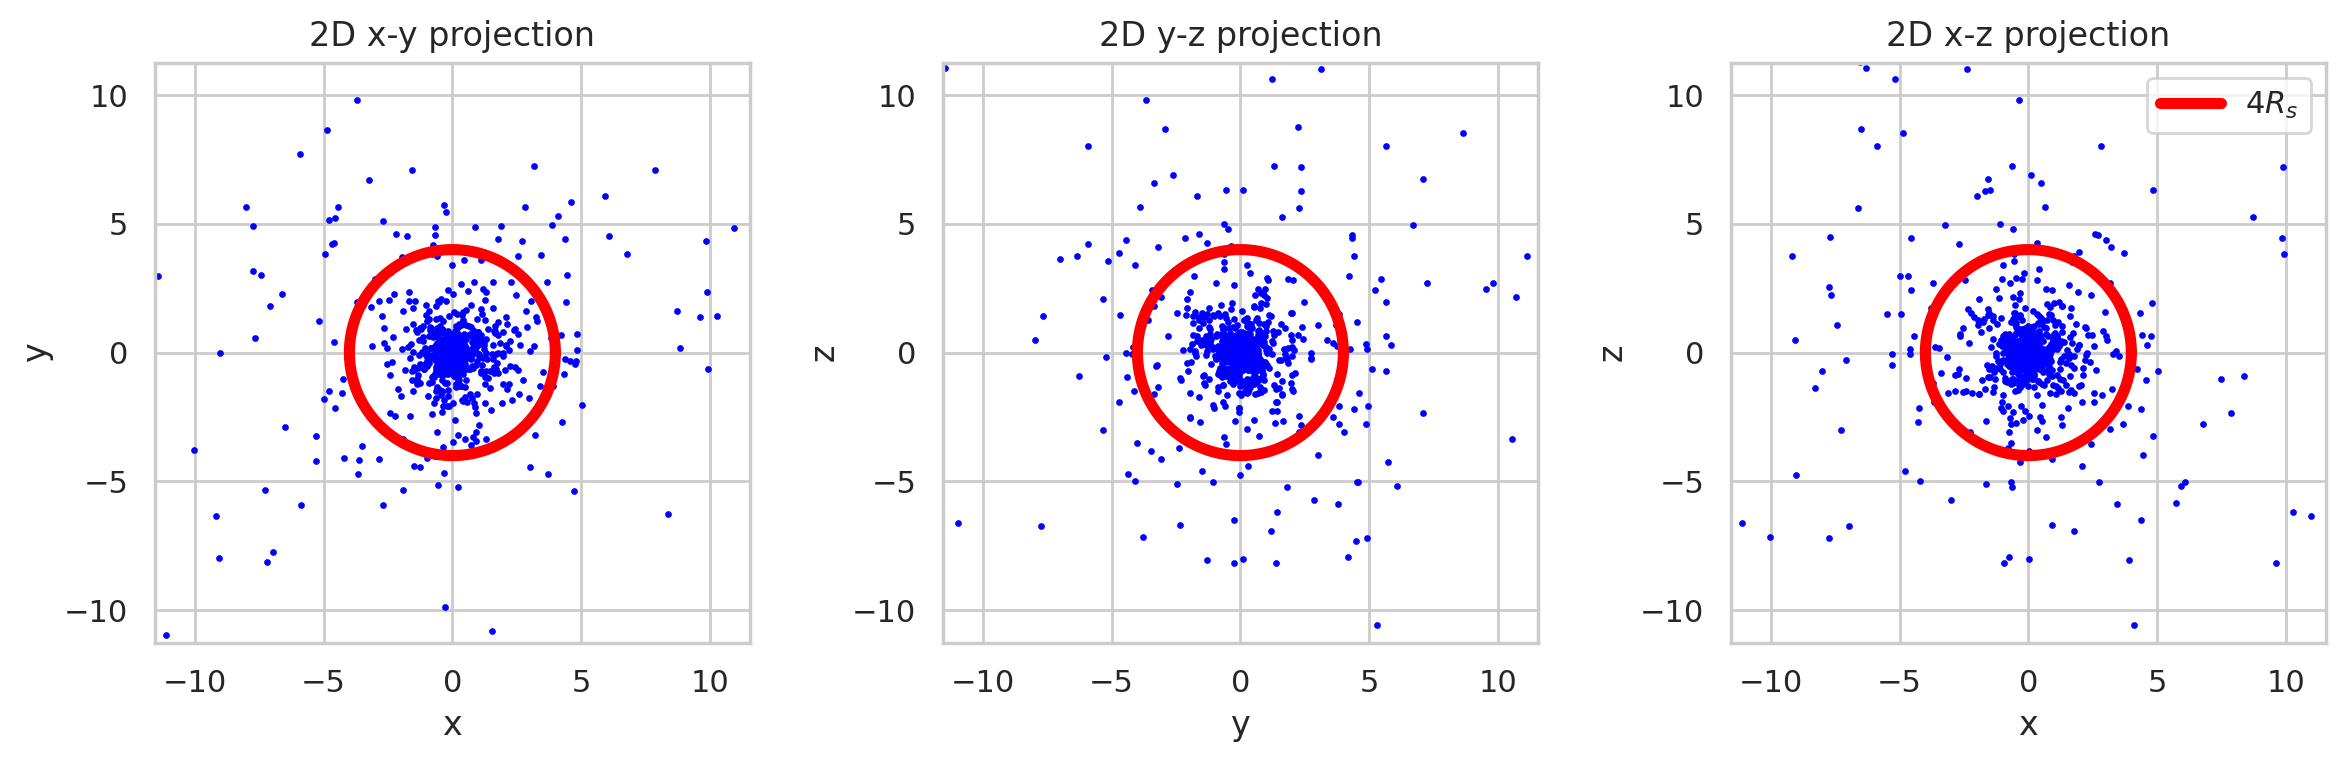

In [55]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(X, Y, Z, c = 'blue', s=2, alpha = 0.3)
ax.set_box_aspect([1,1,1])
#ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)
ax.set_title("Spatial distribution")
ax.set_box_aspect([1,1,1])

plt.show();

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Projection on x-y plane
theta = np.linspace(0, 2 * np.pi, 150)
a = 4*Rs * np.cos( theta )
c = 4*Rs * np.sin( theta )
axes[0].scatter(X, Y, c='blue', s=2)
axes[0].plot(a, c, c='red', linewidth=4, label=r'$4R_s$')
axes[0].axis('equal')
axes[0].set_xlim(-10, 10)
axes[0].set_ylim(-10, 10)
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('2D x-y projection')

# Projection on y-z plane
axes[1].scatter(Y, Z, c='blue', s=2)
axes[1].plot(a, c, c='red', linewidth=4, label=r'$4R_s$')
axes[1].axis('equal')
axes[1].set_xlim(-10, 10)
axes[1].set_ylim(-10, 10)
axes[1].set_xlabel('y')
axes[1].set_ylabel('z')
axes[1].set_title('2D y-z projection')


# Projection on x-z plane
axes[2].scatter(X, Z, c='blue', s=2)
axes[2].plot(a, c, c='red', linewidth=4, label=r'$4R_s$')
axes[2].axis('equal')
axes[2].set_xlim(-10, 10)
axes[2].set_ylim(-10, 10)
axes[2].set_xlabel('x')
axes[2].set_ylabel('z')
axes[2].set_title('2D x-z projection')

plt.legend()
plt.tight_layout()
plt.show()

## Jaffe Potential

The potential can be computed via the following formula:

$$
    \Phi(r) =-4 \pi G \left[ \frac{1}{r} \int_0^r \frac{dr'}{(r'+ R_s)^2} + \int_r^\infty \frac{dr'}{r'(r' + R_s)^2}  \right] = \dots =  4 \pi G \rho_0 R_s^2 \ln{\left[ \frac{r}{r + R_s} \right]}
$$

In [56]:
def Jaffe_pot(radii, Rs, rho_0):
    return 4 * np.pi * rho_0 * Rs**2 * np.log(radii/(radii+Rs))

In [57]:
sorted_radii = np.sort(Rays)

In [58]:
sorted_radii

array([2.48635112e-03, 3.04645109e-03, 3.71005512e-03, 4.07327017e-03,
       4.19825984e-03, 4.44212104e-03, 6.88600308e-03, 7.14790256e-03,
       7.20626540e-03, 7.61442536e-03, 8.31014806e-03, 8.39673626e-03,
       9.76121627e-03, 1.28040531e-02, 1.28687029e-02, 1.44554055e-02,
       1.45062650e-02, 1.48362923e-02, 1.55940050e-02, 1.64057627e-02,
       1.76477213e-02, 1.83979497e-02, 1.93574913e-02, 2.11601616e-02,
       2.14206329e-02, 2.16801784e-02, 2.32598049e-02, 2.34720001e-02,
       2.35452825e-02, 2.53601833e-02, 2.60556416e-02, 2.64313033e-02,
       2.64326647e-02, 2.69063154e-02, 2.93711139e-02, 3.12471799e-02,
       3.18077408e-02, 3.19184167e-02, 3.24614471e-02, 3.32875542e-02,
       3.39079418e-02, 3.46727694e-02, 3.58738591e-02, 3.83804026e-02,
       3.86920323e-02, 3.88250245e-02, 4.07590491e-02, 4.12829046e-02,
       4.17760292e-02, 4.48842619e-02, 4.59030581e-02, 5.05355245e-02,
       5.20789385e-02, 5.25122984e-02, 5.27416639e-02, 5.43996391e-02,
      

In [59]:
j_pot = Jaffe_pot(raggi, Rs, rho_0)
Psi = Jaffe_pot(sorted_radii, Rs, rho_0)

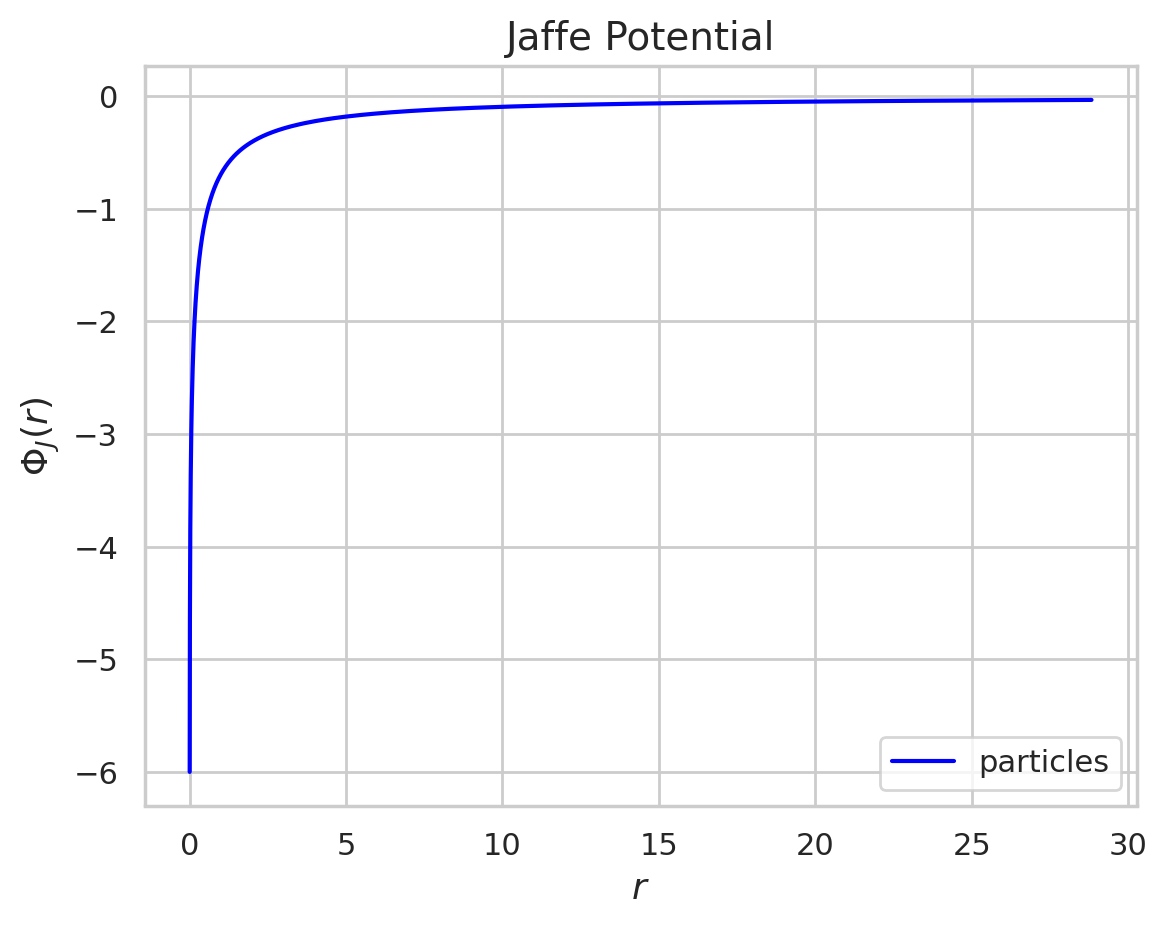

In [60]:
# Set Seaborn style
sns.set(style="whitegrid")

plt.plot(sorted_radii, Psi, color='blue', label='particles')
#plt.plot(raggi, j_pot, color='red', linewidth=5)
plt.title('Jaffe Potential', fontsize=14)
plt.xlabel(r'$r$', fontsize=13)
plt.ylabel(r'$\Phi_J(r)$', fontsize=13)
plt.legend()

In [61]:
from scipy import special
from scipy.special import dawsn, erf, erfi
import scipy.integrate as integrate

In [62]:
def integral(integrand, min, max):
    return integrate.quad(integrand, min, max)

In [63]:
def dawson_integral_positive(x):
    integrand = lambda t: np.exp(t**2)
    result, _ = integrate.quad(integrand, 0, x)
    return np.exp(-x**2) * result
    
def dawson_integral_negative(x):
    integrand = lambda t: np.exp(-t**2)
    result, _ = integrate.quad(integrand, 0, x)
    return np.exp(x**2) * result

In [77]:
def df_q(raggi, Rs, rho_0, E, M):
    t =  Jaffe_pot(raggi, Rs, rho_0) * (1 - q**2) * Rs / M
    #t = E * Rs / M
    #print(t)

    term1 = dawson_integral_negative(np.sqrt(2*t))
    term2 = dawson_integral_negative(np.sqrt(t))
    term3 = dawson_integral_positive(np.sqrt(t))
    term4 = dawson_integral_positive(np.sqrt(2*t))
    #print(term1, np.sqrt(2)*term2,np.sqrt(2)*term3,term4)
    
    return (1 / (2* np.pi**3 * (M*Rs)**(3/2))) * (term1 - np.sqrt(2)*term2 - np.sqrt(2)*term3 + term4)

In [79]:
Psi

array([-5.99942232, -5.79681976, -5.60041174, -5.50737412, -5.47727463,
       -5.42105559, -4.98512687, -4.94805879, -4.93998486, -4.88529634,
       -4.79855366, -4.78827387, -4.63905215, -4.37071629, -4.36574365,
       -4.25103877, -4.24757671, -4.22540623, -4.1763424 , -4.12639526,
       -4.05464242, -4.01374681, -3.96384831, -3.87657443, -3.8645951 ,
       -3.85280538, -3.78402194, -3.77514782, -3.77210217, -3.69961887,
       -3.67324294, -3.65929427, -3.65924409, -3.64194495, -3.55669165,
       -3.49659507, -3.47935795, -3.47599172, -3.45964784, -3.43531722,
       -3.41745176, -3.39588585, -3.36299179, -3.29787049, -3.29008384,
       -3.28678057, -3.2400277 , -3.22776031, -3.21635954, -3.14757418,
       -3.12610422, -3.03437879, -3.00576281, -2.99788785, -2.99374742,
       -2.9643693 , -2.94236321, -2.90341176, -2.88960103, -2.88510346,
       -2.86492611, -2.85309066, -2.83499801, -2.83264846, -2.83056743,
       -2.82686498, -2.7956824 , -2.79045872, -2.76897637, -2.76

In [78]:
q = np.empty(N)
q_min = 0
q_max = 1
f_max = 0.12
y_q = 1

f_q = np.empty(N)

for i in range(0,N):
    while y_q > df_q(sorted_radii, Rs, rho_0, q[i], M):
        q[i] = uniform.rvs(0,1)
        y_q = uniform.rvs(0, f_max)
        f_q[i] = y_q

/tmp/ipykernel_3414/2960675531.py:2: RuntimeWarning: overflow encountered in square
  t =  Jaffe_pot(raggi, Rs, rho_0) * (1 - q**2) * Rs / M
/tmp/ipykernel_3414/2960675531.py:6: RuntimeWarning: invalid value encountered in sqrt
  term1 = dawson_integral_negative(np.sqrt(2*t))


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [45]:
#for plotting pourposes
my_E = np.linspace(0.1, 1.5, len(q))
my_df = np.empty(len(my_E))
for i in range(len(my_E)):
    #print(my_E[i])
    my_df[i] = df_q(Rs, rho_0, my_E[i], M)
    #(my_E[i])**2
    #my_df[i] = df_q(Rs, rho_0, my_E[i], M) * (my_E[i]/max(my_E))**2
    
#my_df

NameError: name 'q' is not defined

## Plot of the distribution function

NameError: name 'my_E' is not defined

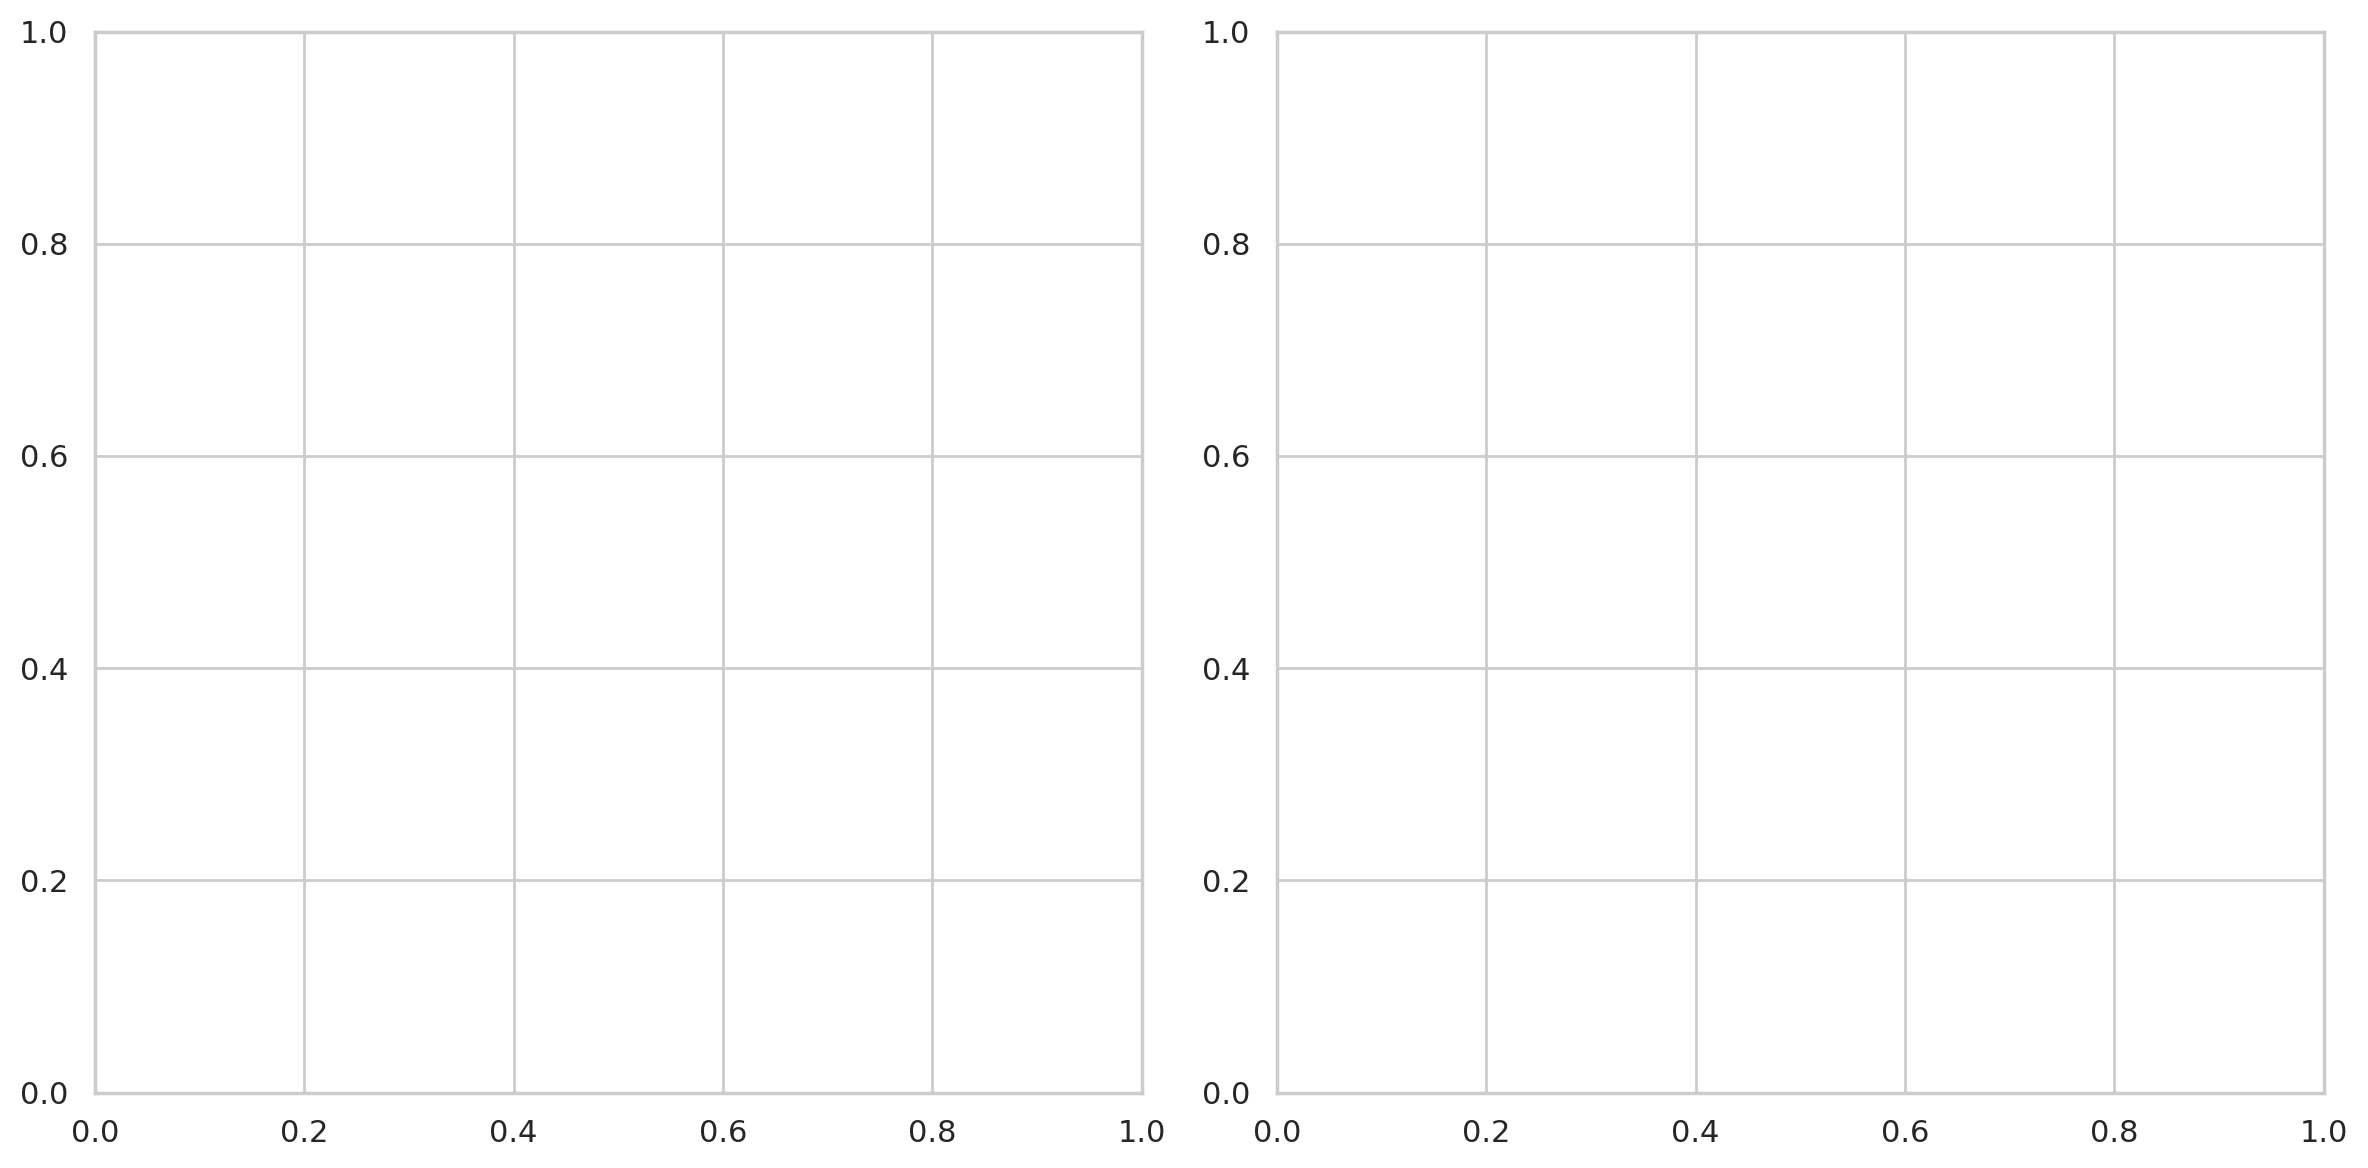

In [65]:
# Set Seaborn style
sns.set(style="whitegrid")

fig, ax = plt.subplots(1, 2, tight_layout=True, figsize=(12, 6))

sns.lineplot(x=my_E, y=my_df, ax=ax[0], color='blue')
ax[0].set_title(r'Distribution Function', fontsize=14)
ax[0].set_xlabel(r'$q$', fontsize=13)
ax[0].set_ylabel(r'$f(q)$', fontsize=13)

sns.lineplot(x=my_E, y=np.log(my_df), ax=ax[1], color='blue')
ax[1].set_title(r'Distribution Function', fontsize=14)
ax[1].set_xlabel(r'$q$', fontsize=13)
ax[1].set_ylabel(r'$\log{f(\varepsilon)}$', fontsize=13)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Common y-axis label
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")

plt.show()

In [66]:
q = np.zeros(N)
q_min = 0
q_max = 1
f_max = 0.12
y_q = 1

f_q = np.empty(N)

for i in range(0,N):
    while y_q > df_q(Rs, rho_0, q[i], M):
        q[i] = uniform.rvs(0,1)
        y_q = uniform.rvs(0, f_max)
        f_q[i] = y_q

ValueError: operands could not be broadcast together with shapes (100,) (1000,) 

In [ ]:
q_teo = np.linspace(0, 1, 1000)
f_teo = np.zeros(len(q_teo))
for i in range(0, len(q_teo)):
    f_teo[i] = df_q(Rs, rho_0, q_teo[i], M)

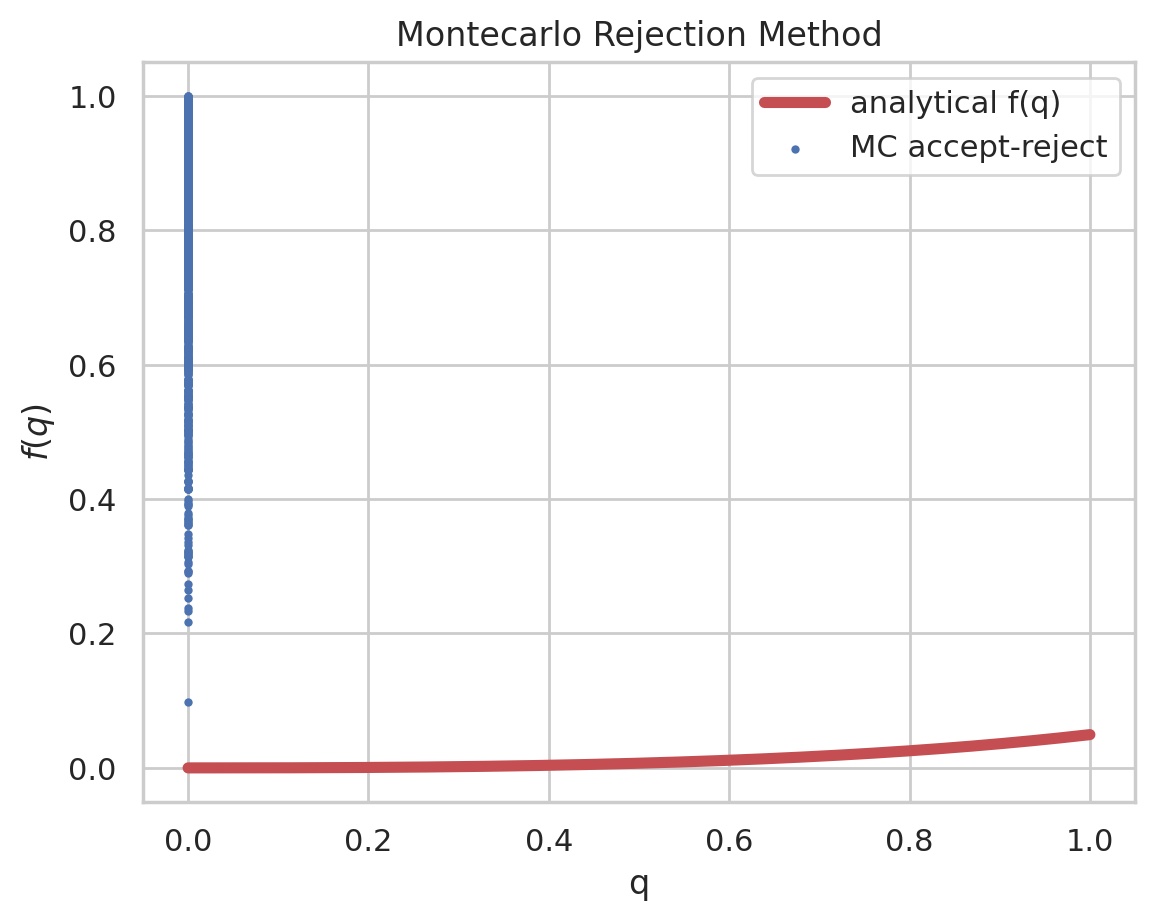

In [76]:
plt.plot(q_teo, f_teo, color='r', label='analytical f(q)', linewidth=4)
plt.scatter(q, f_q, label='MC accept-reject', s=4)
plt.xlabel('q')
plt.ylabel(r'$f(q)$')
plt.title('Montecarlo Rejection Method')
plt.legend()

In [77]:
velocities = q * np.sqrt(2 * -Psi)

In [78]:
theta_v = np.zeros(N)
phi_v = np.zeros(N)
v_x = np.zeros(N)
v_y = np.zeros(N)
v_z = np.zeros(N)

cdf_theta = uniform.rvs(0, 1, size=N)  # cumulative function of thetas


for i in range(0, N):
    theta_v[i] = np.arccos(1 - 2 * cdf_theta[i])
    #theta_v[i] = uniform.rvs(0, np.pi)
    phi_v[i] = uniform.rvs(0, 2*np.pi)
    
    v_x[i] = velocities[i] * np.sin(theta_v[i]) * np.cos(phi_v[i])
    v_y[i] = velocities[i] * np.sin(theta_v[i]) * np.sin(phi_v[i])
    v_z[i] = velocities[i] * np.cos(theta_v[i])

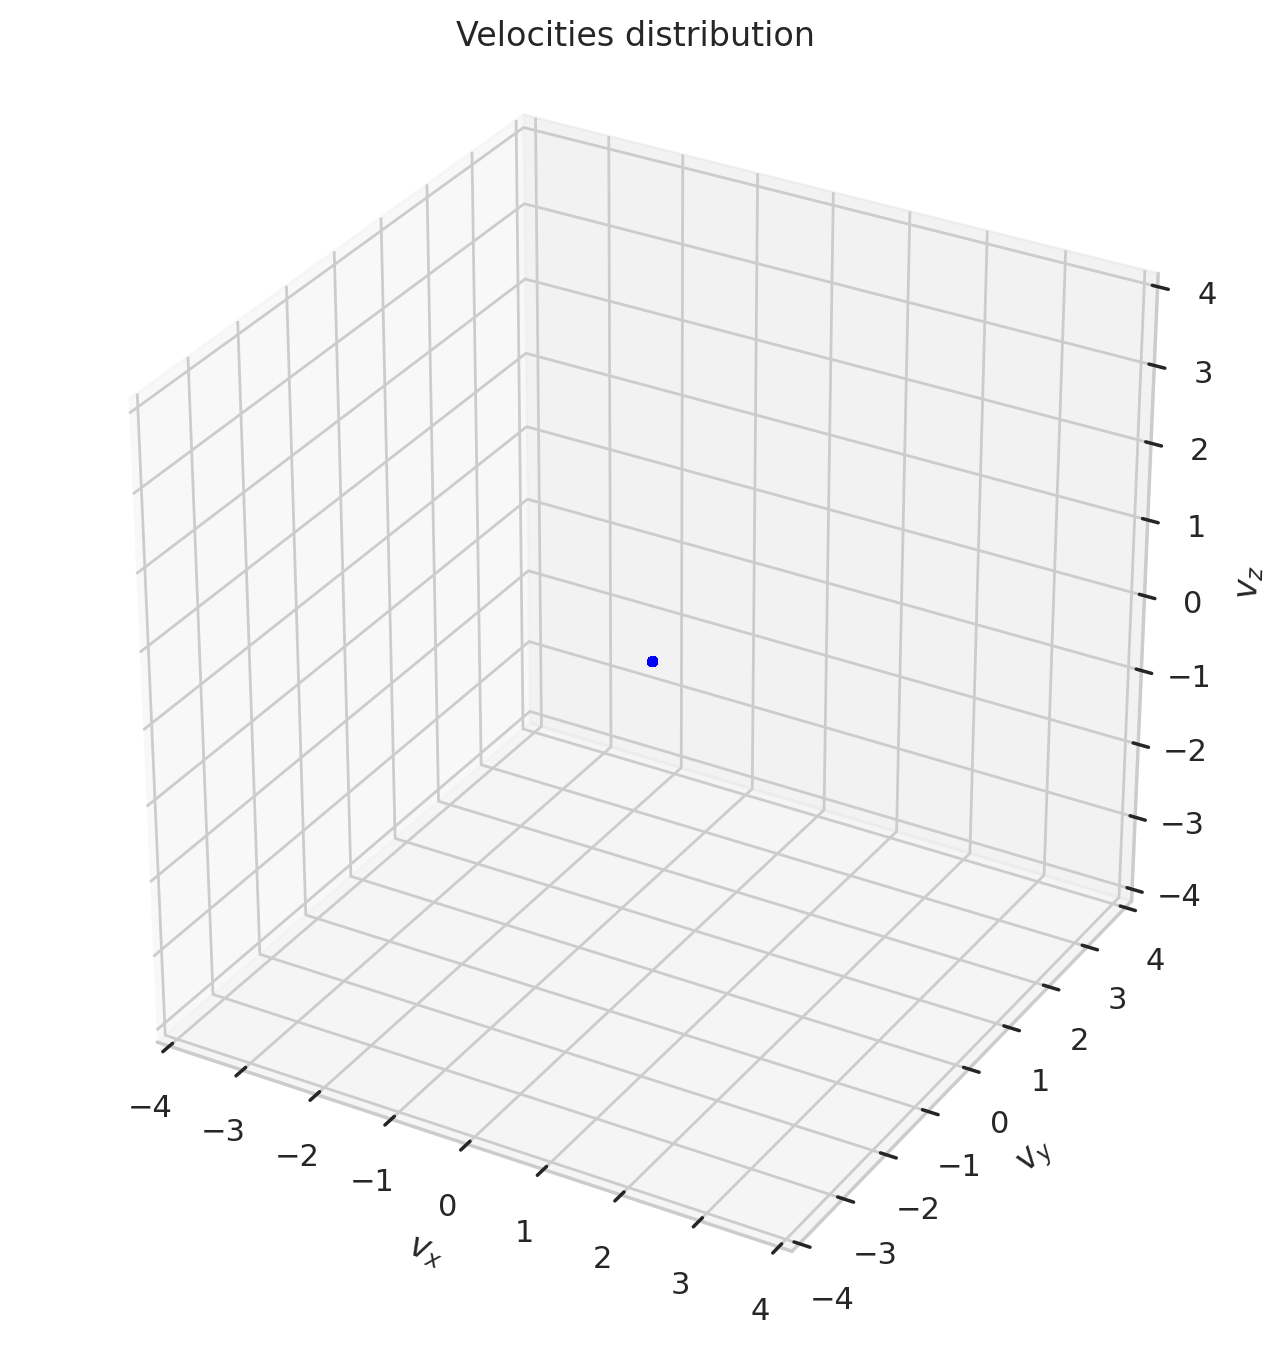

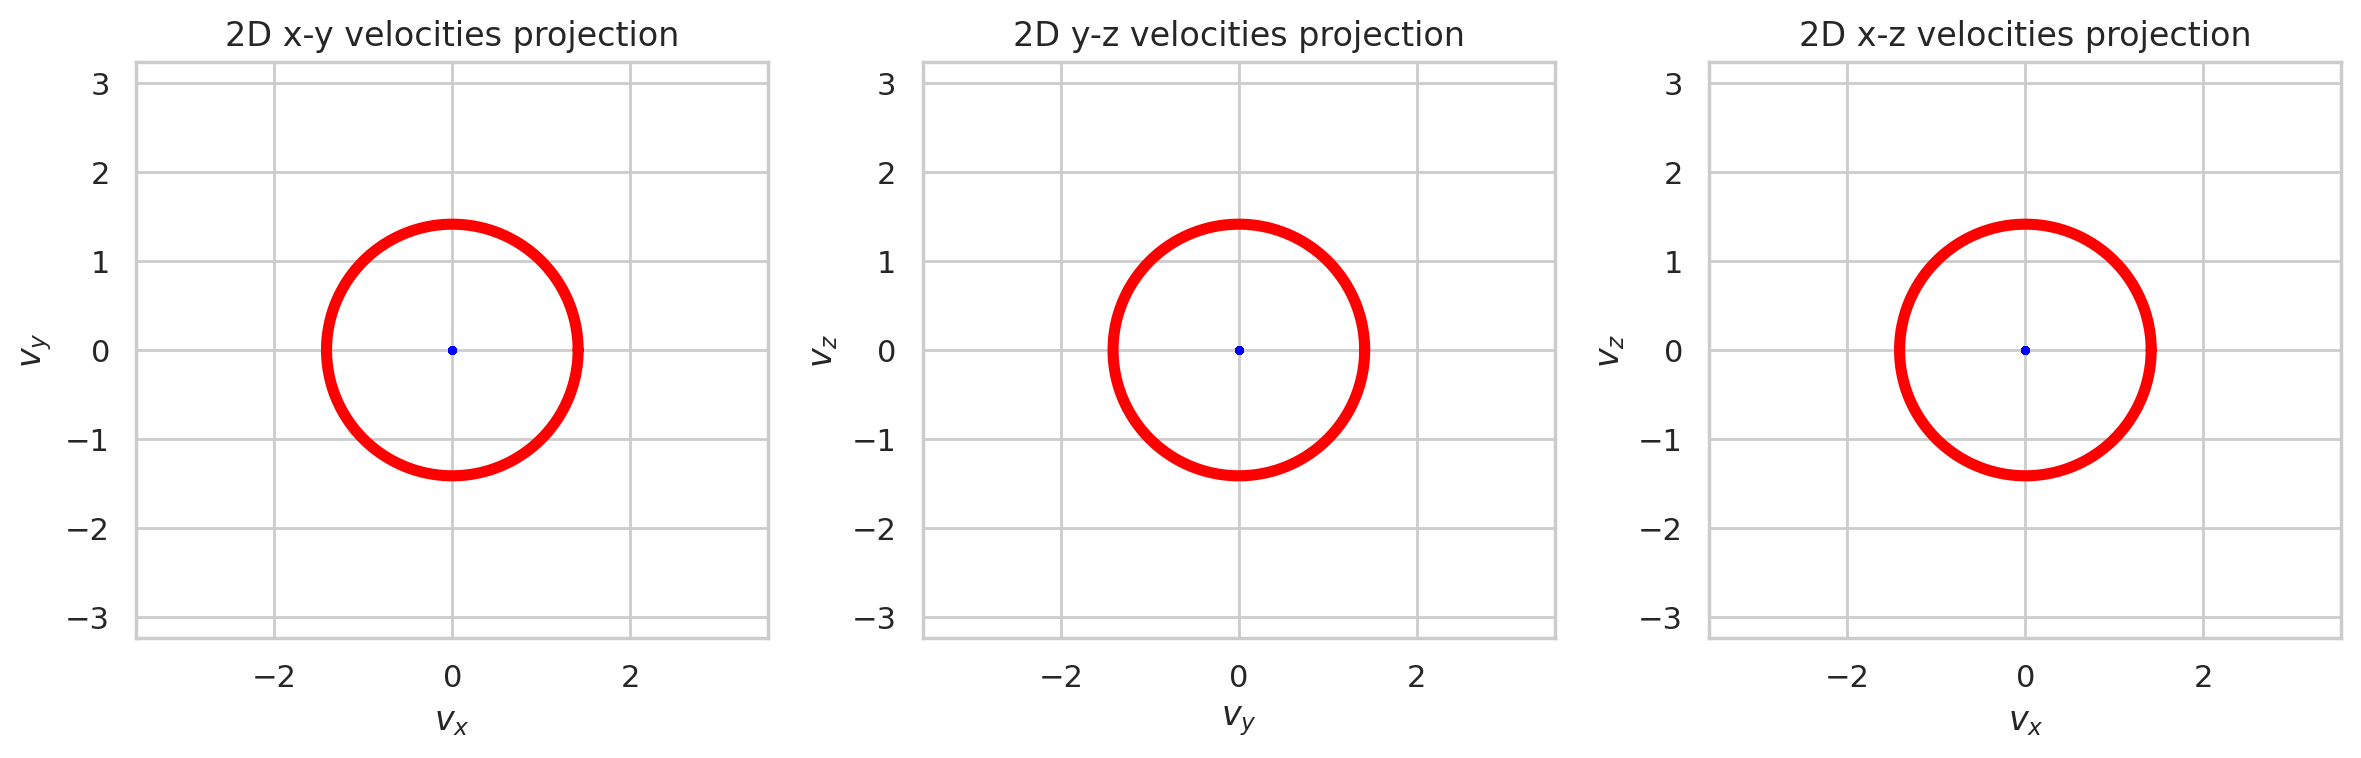

In [79]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(v_x, v_y, v_z, c = 'blue', s=8, alpha=0.4)
ax.set_aspect('equal')
ax.set_xlabel(r'$v_x$')
ax.set_ylabel(r'$v_y$')
ax.set_zlabel(r'$v_z$')
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_zlim(-4, 4)
ax.set_title("Velocities distribution")
plt.show();

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

#Projection on x-y plane
theta = np.linspace(0, 2 * np.pi, 150)
a = np.sqrt(2) * np.cos( theta )
c = np.sqrt(2) * np.sin( theta )
axes[0].scatter(v_x, v_y, c='blue', s=4, alpha=0.4)
axes[0].plot(a, c, c='red', label=r'$v_{esc}$', linewidth=4)
axes[0].axis('equal')
axes[0].set_xlim(-4, 4)
axes[0].set_ylim(-4, 4)
axes[0].set_xlabel(r'$v_x$')
axes[0].set_ylabel(r'$v_y$')
axes[0].set_title('2D x-y velocities projection')


# Projection on y-z plane
axes[1].scatter(v_y, v_z, c='blue', s=4, alpha=0.4)
axes[1].plot(a, c, c='red', label=r'$v_{esc}$', linewidth=4)
axes[1].axis('equal')
axes[1].set_xlim(-4, 4)
axes[1].set_ylim(-4, 4)
axes[1].set_xlabel(r'$v_y$')
axes[1].set_ylabel(r'$v_z$')
axes[1].set_title('2D y-z velocities projection')



# Projection on x-z plane
axes[2].scatter(v_x, v_z, c='blue', s=4, alpha=0.4)
axes[2].plot(a, c, c='red', label=r'$v_{esc}$', linewidth=4)
axes[2].axis('equal')
axes[2].set_xlim(-4, 4)
axes[2].set_ylim(-4, 4)
axes[2].set_xlabel(r'$v_x$')
axes[2].set_ylabel(r'$v_z$')
axes[2].set_title('2D x-z velocities projection')


plt.tight_layout()
plt.show()

## Building the file with initial conditions

In [80]:
# open the file
file = open(f'Jaffe_test_no_perturber_{N}.txt', 'w')

# write the file
file.write(f'{N}\n')
file.write('3\n') # dimensions
file.write('0\n')

for i in range(N):
    file.write(f'{m}\n')

for i in range(N):
    file.write(f'{X[i]} {Y[i]} {Z[i]}\n')
    
for i in range(N):
    file.write(f'{v_x[i]} {v_y[i]} {v_z[i]}\n')

# close the file
file.close()